# Simulating Neurons

With the basics down, we can now begin creating a full neuron 
simulation!

Using the skeleton code below, let's create a simulation of 100
neurons.

In [144]:
from brian2 import *

start_scope()

# Equation parameters
tau = 10*ms;
Vt = -50*mV;
Vr = -60*mV;
V0 = -49*mV

# Defining neuron equation
eqs = '''
dv/dt  = (V0-v)/tau : volt
'''

# DEFINE NUMBER OF NEURONS
N = 100;

# Create a NeuronGroup with:
# N total neurons
# A threshold value of Vt
# A reset value of Vr
neurons = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr')

Now that we have our network, lets randomize the initial value of ``v`` to a value between ``-60*mV`` and ``-50mV``. To do this, fill in the code below (don't forget units).

In [145]:
neurons.v = '-60*mV + rand() * 10*mV';

Next, let's create some synpases. We'll be using two types in this
network: inhibitory and excitatory.

Inhibitory synapses cause a neuron to become less likely to fire,
while excitatory synapses cause a neuron to become more likely to
fire. In our model, we can decrease or increase the value of ``v`` of a post-synpatic neuron to obtain this effect.

In [ ]:
# Voltage values that will be added to a post-synaptic neuron
# for excititory or inhibitory synapses
Ve = 10*mV;
Vi = -5*mV;

Now, create two different kinds of synapses using the outline below. What values are we adding to the post-synaptic cells?

In [ ]:
excit_con = Synapses(neurons, neurons, on_pre='v_post += Ve')
inhib_con = Synapses(neurons, neurons, on_pre='v_post += Vi')

Now, let's connect the first 20 neurons (indices 0-19) to all other neurons using the inhibitory synapses. Then, we'll connect the last 80 neurons to all other neurons using excitatory synapses.

Note the use of ``p=``. This defines the probability that a given neuron will connect to another. This will add some randomness to our model, but only connecting some neurons.

In [148]:
excit_con.connect('i>=20',p=0.01)
inhib_con.connect('i<20',p=0.15)

Now, let's create a ``SpikeMonitor`` and a ``StateMonitor``. Make sure the ``StateMonitor`` recording the variable ``v`` in all neurons!

In [149]:
s_mon = SpikeMonitor(neurons)
v_mon = StateMonitor(neurons, 'v', record=True)

Finally, run the model for 500 milliseconds and plot the output of the ``SpikeMonitor``.

In [ ]:
run(500*ms)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')

We can also look at how the voltage changes in individual
neurons, by plotting the contents of the ``StateMonitor``.

Try looking at how different neurons changed over time,
by changing the index of ``v_mon.v`` below.

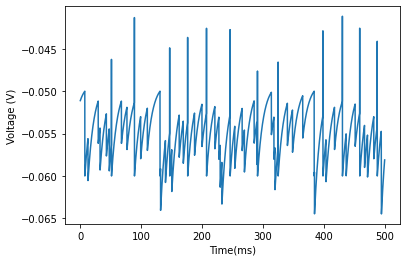

In [147]:
plot(v_mon.t/ms,v_mon[0].v/volt);
xlabel('Time(ms)');
ylabel('Voltage (V)');